In [0]:
# Colab library to upload files to notebook
from google.colab import files
import os, sys
# Install Kaggle library
!pip install -q kaggle

In [0]:
os.chdir('/root/.kaggle')

In [10]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
!kaggle datasets download -d tongpython/cat-and-dog

 98% 214M/218M [00:01<00:00, 123MB/s]
100% 218M/218M [00:01<00:00, 122MB/s]


In [12]:
import os, sys
import tensorflow as tf
os.listdir()

['kaggle.json', 'cat-and-dog.zip']

In [13]:
!unzip cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  inflating: training_set/training_set/cats/cat.3719.jpg  
  infl

In [14]:
os.getcwd()

'/root/.kaggle'

In [15]:
os.listdir()

['kaggle.json', 'training_set', 'test_set', 'cat-and-dog.zip']

In [0]:
os.chdir('/root/.kaggle/training_set/training_set')

In [17]:
os.listdir()

['cats', 'dogs']

In [0]:
train_dir = '/root/.kaggle/training_set/training_set'
test_dir = '/root/.kaggle/test_set/test_set'
default_dir = '/root/.kaggle'

train_cat, train_dog, test_cat, test_dog = [], [],[],[]
def get_data():
    os.chdir(default_dir)
    # get data's on training cat
    current_dir = train_dir+'/cats'
    os.chdir(current_dir)
    train_data_cat = os.listdir()
    train_cat.extend(train_data_cat)
    
    # get data's on training dog
    current_dir = train_dir +'/dogs'
    os.chdir(current_dir)
    train_data_dog = os.listdir()
    train_dog.extend(train_data_dog)
    
    # get data's on test cat
    current_dir = test_dir+'/cats'
    os.chdir(current_dir)
    test_data_cat = os.listdir()
    test_cat.extend(test_data_cat)
    
    # get data's on test dog
    current_dir = test_dir +'/dogs'
    os.chdir(current_dir)
    test_data_dog = os.listdir()
    os.chdir(default_dir)
    test_dog.extend(test_data_dog)
    return

get_data()

In [19]:
print('Number of cats in our train data is: ', len(train_cat))
print('Number of dog in our train data is: ', len(train_dog))
print('Number of cats in our test data is: ', len(test_cat))
print('Number of dogs in our test data is: ', len(test_dog))
print('Total training data is: ', len(train_cat)+len(train_dog))
print('Total test data is: ', len(test_cat)+len(test_dog))


Number of cats in our train data is:  4001
Number of dog in our train data is:  4006
Number of cats in our test data is:  1012
Number of dogs in our test data is:  1013
Total training data is:  8007
Total test data is:  2025


In [20]:
import numpy as np
np.random.seed(100)

import keras
from keras.preprocessing import image

train_images = []
train_target = []
test_images = []
test_target = []


for i in train_cat:
    try:
        directory = train_dir + '/cats/' + i
        img = image.load_img(directory, target_size = (224,224), grayscale = False)
        img=image.img_to_array(img)
        img = img/255
        train_images.append(img)
        os.chdir(default_dir)
        train_target.append(0)
    except OSError as err:
        continue

for i in train_dog:
    try:
        directory = train_dir + '/dogs/' + i
        img = image.load_img(directory, target_size = (224,224), grayscale = False)
        img=image.img_to_array(img)
        img = img/255
        train_images.append(img)
        os.chdir(default_dir)
        train_target.append(1)
    
    except OSError as err:
        continue
    


Using TensorFlow backend.


In [0]:
for i in test_cat:
    try:
        directory = test_dir + '/cats/' + i
        img = image.load_img(directory, target_size = (224,224), grayscale = False)
        img=image.img_to_array(img)
        img = img/255
        test_images.append(img)
        os.chdir(default_dir)
        test_target.append(0)
    except OSError as err:
        continue

for i in test_dog:
    try:
        directory = test_dir + '/dogs/' + i
        img = image.load_img(directory, target_size = (224,224), grayscale = False)
        img=image.img_to_array(img)
        img = img/255
        test_images.append(img)
        os.chdir(default_dir)
        test_target.append(1)
    
    except OSError as err:
        pass
    

In [22]:
train_images = np.array(train_images)
test_images = np.array(test_images)
train_target = np.array(train_target)
test_target = np.array(test_target)
train_images.shape, test_images.shape, train_target.shape, test_target.shape

((8005, 224, 224, 3), (2023, 224, 224, 3), (8005,), (2023,))

In [0]:
import tensorflow as tf

from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (7,7), activation='relu', input_shape=(224,224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(2, activation = 'softmax'))


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 218, 218, 32)      4736      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 105, 105, 16)      12816     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 52, 52, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 51, 51, 8)         520       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 5000)              0

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_target, epochs=10, 
                    validation_data=(test_images, test_target))


Epoch 1/10
251/251 [==============================] - 8s 33ms/step - loss: 0.6921 - accuracy: 0.5210 - val_loss: 0.6853 - val_accuracy: 0.5690
Epoch 2/10
251/251 [==============================] - 8s 32ms/step - loss: 0.6757 - accuracy: 0.5826 - val_loss: 0.6598 - val_accuracy: 0.6164
Epoch 3/10
251/251 [==============================] - 8s 32ms/step - loss: 0.6192 - accuracy: 0.6683 - val_loss: 0.6246 - val_accuracy: 0.6644
Epoch 4/10
251/251 [==============================] - 8s 31ms/step - loss: 0.5544 - accuracy: 0.7453 - val_loss: 0.6066 - val_accuracy: 0.6876
Epoch 5/10
251/251 [==============================] - 8s 31ms/step - loss: 0.4863 - accuracy: 0.8206 - val_loss: 0.6169 - val_accuracy: 0.6841
Epoch 6/10
251/251 [==============================] - 8s 31ms/step - loss: 0.4290 - accuracy: 0.8837 - val_loss: 0.6400 - val_accuracy: 0.6584
Epoch 7/10
251/251 [==============================] - 8s 32ms/step - loss: 0.3961 - accuracy: 0.9169 - val_loss: 0.6294 - val_accuracy: 0.6703

64/64 - 1s - loss: 0.6519 - accuracy: 0.6520


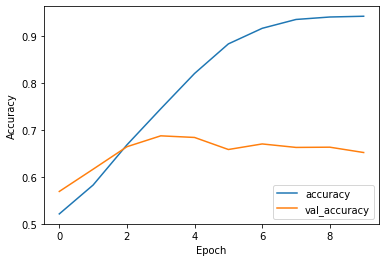

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_target, verbose=2)


In [28]:
print(test_acc)

0.6520019769668579


# data image generators

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data


In [31]:
batch_size = 100
target_size = (224,224)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=target_size,
                                                           class_mode='binary')


Found 8005 images belonging to 2 classes.


In [32]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=target_size,
                                                              class_mode='binary')


Found 2023 images belonging to 2 classes.


# visualize training image

In [0]:
sample_training_images, _ = next(train_data_gen)


In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


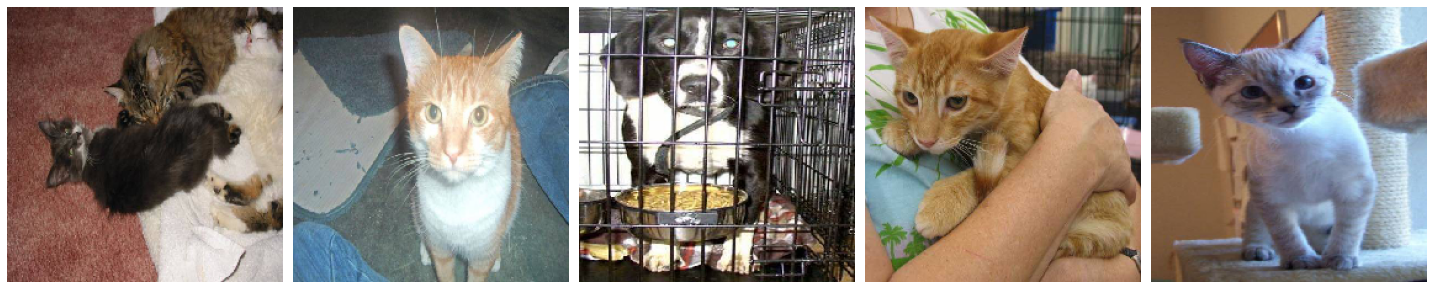

In [35]:
plotImages(sample_training_images[:5])


In [38]:
model = models.Sequential()
model.add(layers.Conv2D(32, (7,7), activation='relu', input_shape=(224,224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 218, 218, 32)      4736      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 105, 105, 16)      12816     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 52, 52, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 51, 51, 8)         520       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)             

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
epochs = 10
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=8005// batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=2023// batch_size
)


Epoch 1/10
80/80 [==============================] - 32s 398ms/step - loss: 0.6916 - accuracy: 0.5380 - val_loss: 0.6915 - val_accuracy: 0.5085
Epoch 2/10
80/80 [==============================] - 31s 389ms/step - loss: 0.6514 - accuracy: 0.6185 - val_loss: 0.6650 - val_accuracy: 0.5865
Epoch 3/10
80/80 [==============================] - 31s 382ms/step - loss: 0.6097 - accuracy: 0.6834 - val_loss: 0.6327 - val_accuracy: 0.6520
Epoch 4/10
80/80 [==============================] - 30s 381ms/step - loss: 0.5762 - accuracy: 0.7217 - val_loss: 0.6302 - val_accuracy: 0.6595
Epoch 5/10
80/80 [==============================] - 31s 385ms/step - loss: 0.5451 - accuracy: 0.7562 - val_loss: 0.6271 - val_accuracy: 0.6685
Epoch 6/10
80/80 [==============================] - 30s 379ms/step - loss: 0.5062 - accuracy: 0.8024 - val_loss: 0.6320 - val_accuracy: 0.6645
Epoch 7/10
80/80 [==============================] - 30s 378ms/step - loss: 0.4656 - accuracy: 0.8458 - val_loss: 0.6300 - val_accuracy: 0.6695

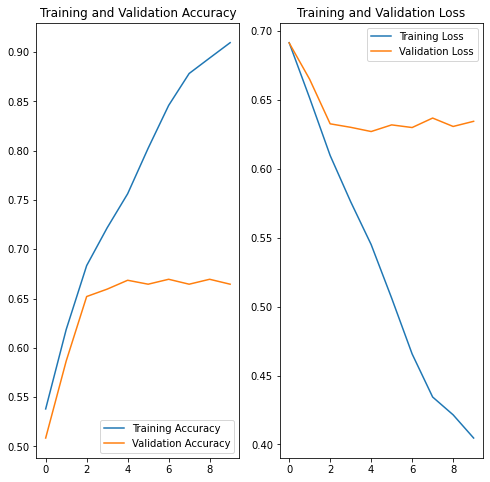

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Augumentation

### applying horizontal flip

In [43]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=target_size)



Found 8005 images belonging to 2 classes.


### take one sample of the image and repeat augumentation 5 times

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]


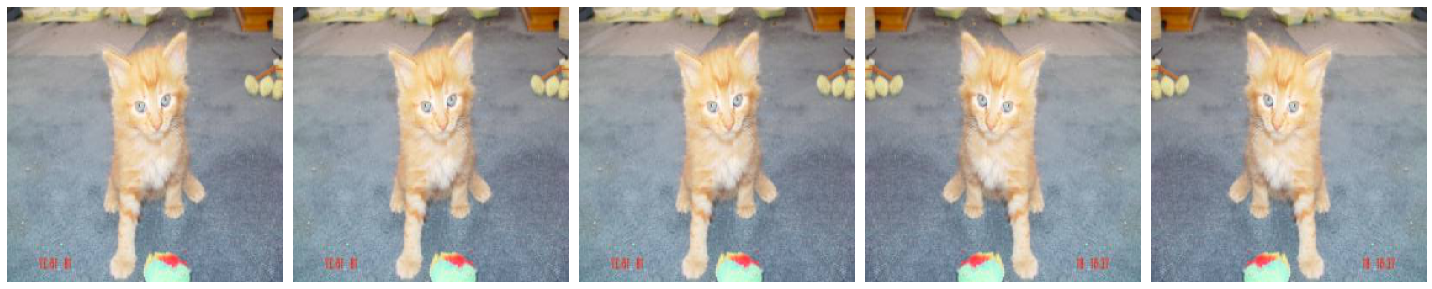

In [45]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)


### randomly rotate the image

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)


In [47]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=target_size)

augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Found 8005 images belonging to 2 classes.


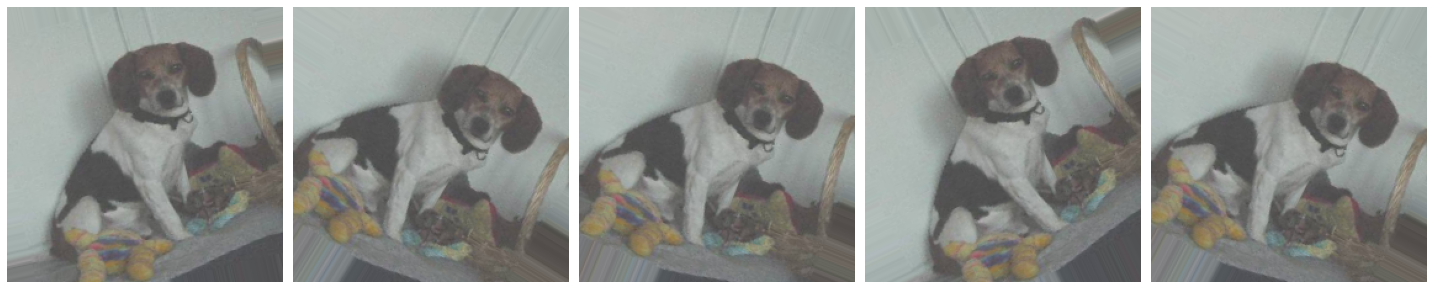

In [48]:
plotImages(augmented_images)


# apply zoom augumentation

In [0]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 


In [50]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=target_size)

augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Found 8005 images belonging to 2 classes.


# putting it all together

In [0]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


In [52]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=target_size,
                                                     class_mode='binary')


Found 8005 images belonging to 2 classes.


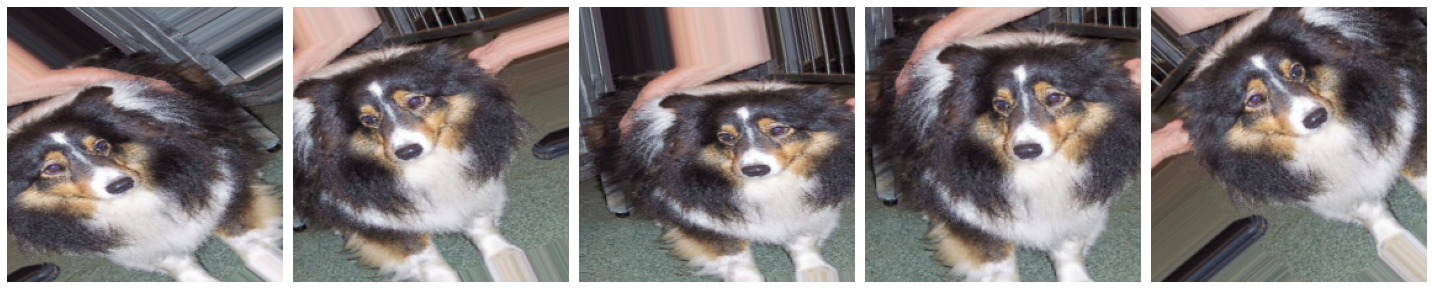

In [53]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)


# create validator data generator

In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)


In [55]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=test_dir,
                                                 target_size=target_size,
                                                 class_mode='binary')


Found 2023 images belonging to 2 classes.


# dropout

In [56]:
model = models.Sequential()
model.add(layers.Conv2D(32, (7,7), activation='relu', input_shape=(224,224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 218, 218, 32)      4736      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 105, 105, 16)      12816     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 52, 52, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 51, 51, 8)         520       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5000)             

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [67]:
epochs = 10
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=8005// batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=2023// batch_size
)


Epoch 1/10
80/80 [==============================] - 101s 1s/step - loss: 0.6874 - accuracy: 0.5418 - val_loss: 0.6632 - val_accuracy: 0.6165
Epoch 2/10
80/80 [==============================] - 97s 1s/step - loss: 0.6712 - accuracy: 0.6019 - val_loss: 0.6363 - val_accuracy: 0.6565
Epoch 3/10
80/80 [==============================] - 97s 1s/step - loss: 0.6708 - accuracy: 0.5906 - val_loss: 0.6795 - val_accuracy: 0.5530
Epoch 4/10
80/80 [==============================] - 97s 1s/step - loss: 0.6716 - accuracy: 0.5867 - val_loss: 0.6338 - val_accuracy: 0.6445
Epoch 5/10
80/80 [==============================] - 97s 1s/step - loss: 0.6615 - accuracy: 0.6061 - val_loss: 0.6456 - val_accuracy: 0.6420
Epoch 6/10
80/80 [==============================] - 97s 1s/step - loss: 0.6480 - accuracy: 0.6207 - val_loss: 0.6243 - val_accuracy: 0.6620
Epoch 7/10
80/80 [==============================] - 97s 1s/step - loss: 0.6385 - accuracy: 0.6372 - val_loss: 0.6247 - val_accuracy: 0.6625
Epoch 8/10
80/80 [=

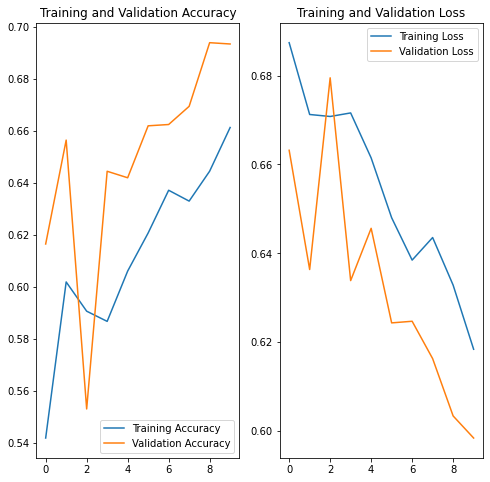

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
